# 01_eda_with_path_fix
This notebook includes the path fix so that `from src...` imports work when run from the `notebooks/` folder.

In [6]:
# --- Ensure the project root (one level up) is on sys.path ---
import sys, os
sys.path.append(os.path.abspath('..'))
print('Added project root to sys.path:', os.path.abspath('..'))

# Standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# Project helpers
from src.features import add_calendar_features, add_us_holiday_flags
from src.holidays_us import build_holidays


Added project root to sys.path: C:\Projects\hypermarket-holiday-forecast


## Load data (edit the path to your CSVs)

In [ ]:
# EDIT THIS LINE to your file names
DATA_DIR = Path('../data/raw')
csv_path = DATA_DIR / 'train.csv'  # e.g., Walmart Recruiting 'train.csv'
df = pd.read_csv(csv_path)

# Try to guess the date and target columns (edit as needed)
date_col_candidates = [c for c in df.columns if c.lower() in ('date','ds')]
target_col_candidates = [c for c in df.columns if c.lower() in ('weekly_sales','sales','y')]

print('Columns:', list(df.columns))
print('Date candidates:', date_col_candidates)
print('Target candidates:', target_col_candidates)

date_col = date_col_candidates[0] if date_col_candidates else 'Date'
target_col = target_col_candidates[0] if target_col_candidates else 'Weekly_Sales'

df[date_col] = pd.to_datetime(df[date_col])
df = df.rename(columns={date_col:'date', target_col:'sales'}).sort_values('date').reset_index(drop=True)
df.head()


## Feature engineering (calendar + holidays)

In [9]:
df = add_calendar_features(df, date_col='Date')
df = add_us_holiday_flags(df, date_col='Date')
holidays = build_holidays(df['Date'].dt.year.min(), df['Date'].dt.year.max())
df.head()


,Store,Dept,Date,Weekly_Sales,IsHoliday,dow,week,month,year,is_weekend,is_thanksgiving,is_christmas,is_black_friday,win_thanks_7,win_xmas_7
0,1,1,2010-02-05,24924.50,False,4,5,2,2010,0,0,0,0,0.0,0.0
1,1,1,2010-02-12,46039.49,True,4,6,2,2010,0,0,0,0,0.0,0.0
2,1,1,2010-02-19,41595.55,False,4,7,2,2010,0,0,0,0,0.0,0.0
3,1,1,2010-02-26,19403.54,False,4,8,2,2010,0,0,0,0,0.0,0.0
4,1,1,2010-03-05,21827.90,False,4,9,3,2010,0,0,0,0,0.0,0.0


## Quick visuals

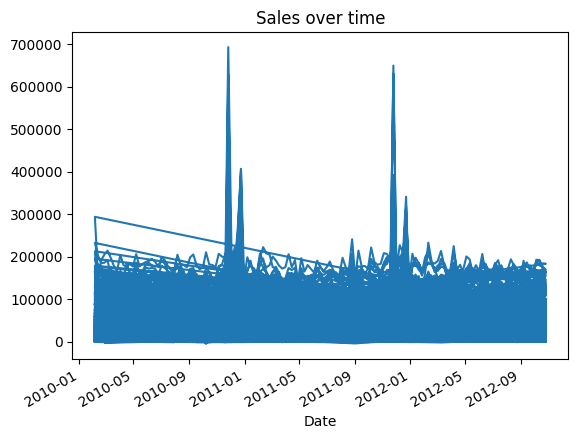

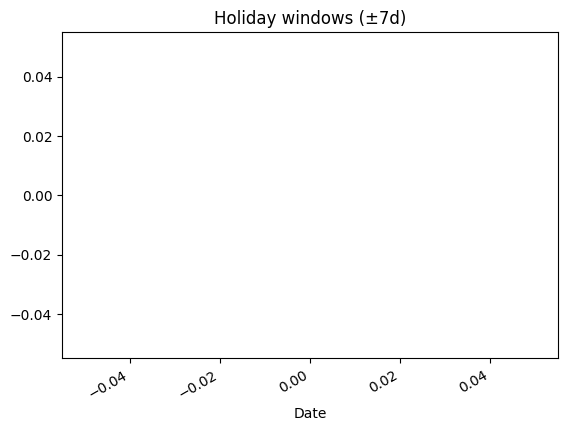

In [12]:
df.set_index('Date')['Weekly_Sales'].plot(title='Sales over time'); plt.show()

# Zoom around Thanksgiving and Christmas windows
is_holiday_win = (df['win_thanks_7'] == 1) | (df['win_xmas_7'] == 1)
df.loc[is_holiday_win].set_index('Date')['Weekly_Sales'].plot(title='Holiday windows (±7d)'); plt.show()
